In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Loading Data

$\pi_i = P(S_1 = i)$

In [2]:
initial_states = np.loadtxt('initialStateDistribution.txt')
print(initial_states.shape, initial_states.dtype)
num_states = initial_states.shape[0]

(27,) float64


$a_{ij} = P(S_{t+1} = j | S_t = i)$

In [3]:
transition_matrix = np.loadtxt('transitionMatrix.txt')
print(transition_matrix.shape, transition_matrix.dtype)

(27, 27) float64


$b_{jk} = P(O_t = k | S_t = j)$

In [4]:
emission_matrix = np.loadtxt('emissionMatrix.txt')
print(emission_matrix.shape, emission_matrix.dtype)

(27, 2) float64


$T$

In [5]:
observations = np.loadtxt('observations.txt', dtype=int)
print(observations.shape, observations.dtype)
num_observations = observations.shape[0]

(430000,) int64


#### Viterbi Algorithm 
Getting the most probable sequence of hidden states based on the observations.

In [6]:
# Fill l* from left to right 

In [7]:
print(np.argmax(observations == 1))

30


In [8]:
# Forward pass
l_star = np.zeros((num_states, num_observations))
phi = np.zeros((num_states, num_observations), dtype=int)
log_transition_matrix = np.log(transition_matrix)
log_emission_matrix = np.log(emission_matrix)
l_star[:, 0] = np.log(initial_states) + log_emission_matrix[:, observations[0]]
for t in range(0, num_observations - 1):
    transition_probs = l_star[:, t][:, np.newaxis] + log_transition_matrix 
    l_star[:, t+1] = np.max(transition_probs, axis=0) + log_emission_matrix[:, observations[t+1]]
    phi[:, t+1] = np.argmax(transition_probs, axis=0)

In [9]:
# Backtrack through l* using phi
most_likely_hidden_states = np.zeros(num_observations, dtype=int)
most_likely_hidden_states[-1] = int(np.argmax(l_star[:, -1]))
for t in range(num_observations - 2, -1, -1):
    most_likely_hidden_states[t] = phi[most_likely_hidden_states[t+1], t+1]
hidden_states_map = {i: chr(65 + i) for i in range(26)}
hidden_states_map[26] = " " 
mapped_hidden_states = [hidden_states_map[i] for i in most_likely_hidden_states]
hidden_string = f"{mapped_hidden_states[0]}"
for i in range(1, num_observations):
    if hidden_string[-1] != mapped_hidden_states[i]:
        hidden_string += mapped_hidden_states[i]
print(hidden_string)

A HOUSE DIVIDED AGAINST ITSELF CANOT STAND


Text(0, 0.5, 'Hidden State')

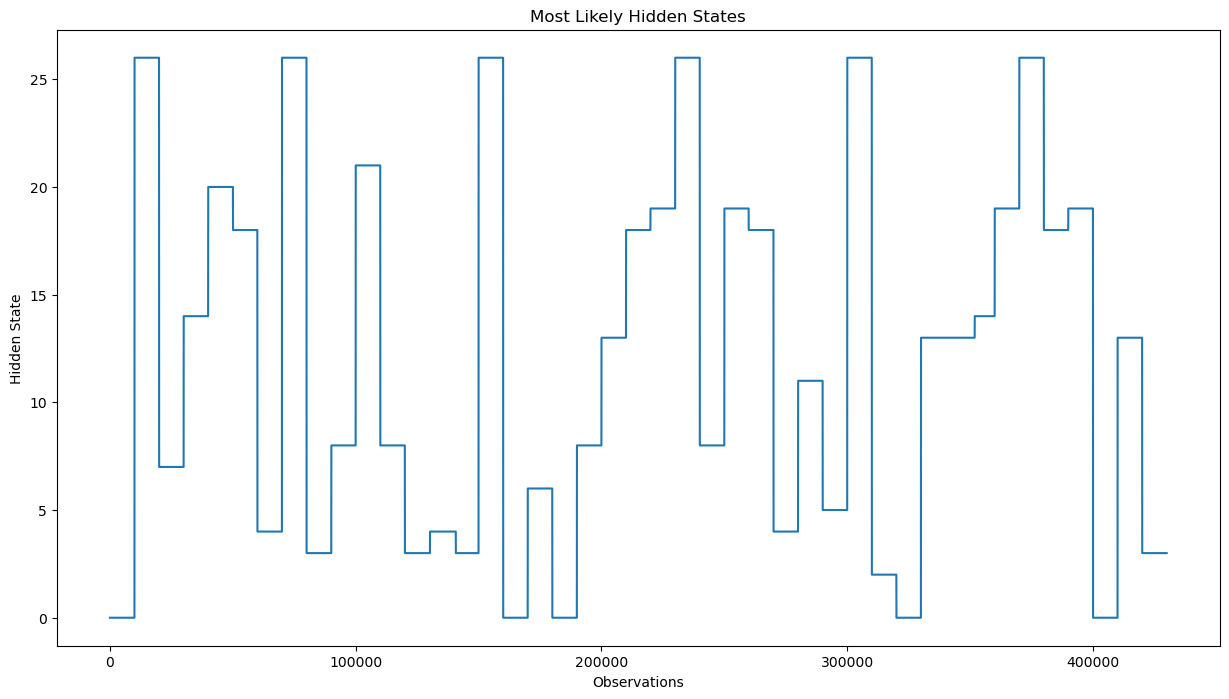

In [10]:
fig = plt.figure(figsize=(15, 8))
plt.plot(most_likely_hidden_states)
plt.title("Most Likely Hidden States")
plt.xlabel("Observations")
plt.ylabel("Hidden State")